# Task 1

258


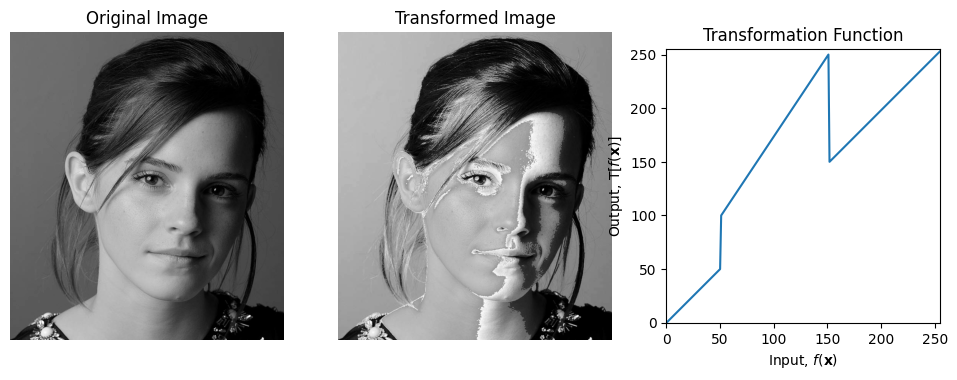

In [6]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 50, 51)
y1 = x1

x2 = np.array([50, 50])
y2 = np.array([50, 100])

x3 = np.linspace(50, 150, 101)
y3 = np.linspace(100, 250, 101)

x4 = np.array([150, 150])
y4 = np.array([250, 150])

x5 = np.linspace(150, 255, 106)
y5 = np.linspace(150, 255, 106)

# Combine the segments
x = np.concatenate((x1, x2[1:], x3[1:], x4[1:], x5[1:]))
y = np.concatenate((y1, y2[1:], y3[1:], y4[1:], y5[1:]))
print(len(y))

f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y[f], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(y,)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal') 
plt.show()

# Task 2

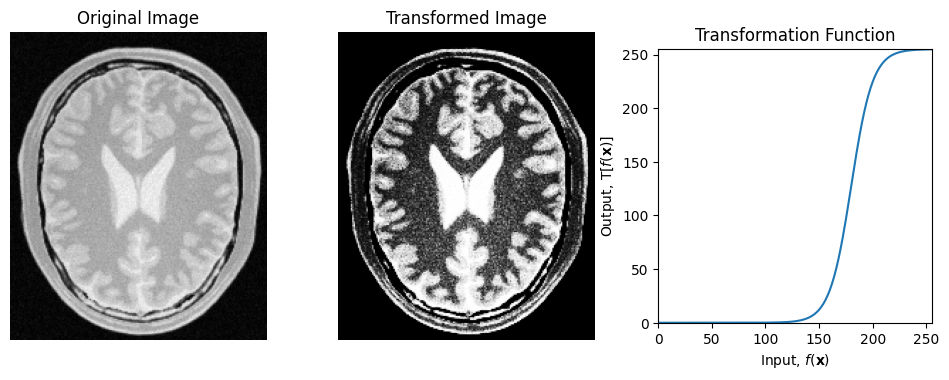

In [23]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def white_matter_curve(x):
    #sigmoid function to map the intensity values for white matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(-aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)

y_white = white_matter_curve(f)

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y_white[img], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].plot(y_white)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
for a in ax[0:2]:
    a.axis('off')
plt.show()

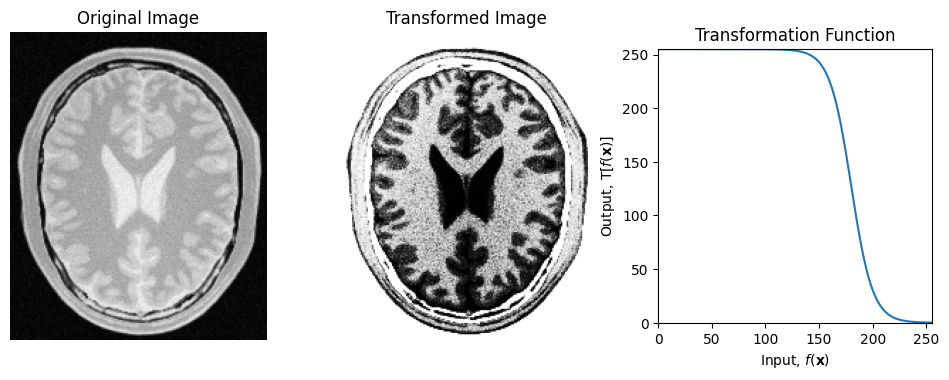

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def white_matter_curve(x):
    #inverse sigmoid function to map the intensity values for dark matter
    aplpha = 0.1
    beta = 180
    curve = 255/(1+np.exp(aplpha*(x-beta)))
    return curve

f = np.linspace(0,255,256)

y_white = white_matter_curve(f)

img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(y_white[img], cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].plot(y_white)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
for a in ax[0:2]:
    a.axis('off')
plt.show()

# Task 3

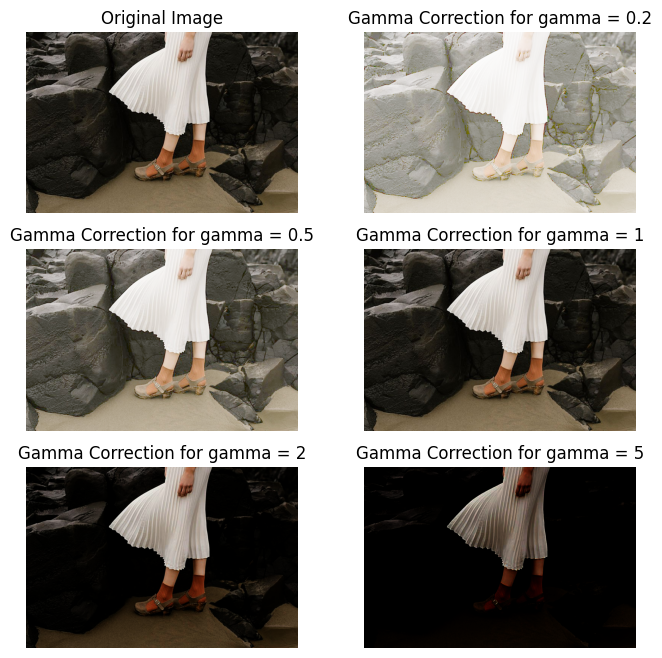

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\highlights_and_shadows.jpg')
assert img is not None

#Apply Linear gamma correction

gamma_1 = 0.2
gamma_2 = 0.5
gamma_3 = 1.0
gamma_4 = 2.0
gamma_5 = 5.0

t1 = np.array([((i/255.0)**gamma_1)*255 for i in np.arange(0,256)]).astype('uint8')
t2 = np.array([((i/255.0)**gamma_2)*255 for i in np.arange(0,256)]).astype('uint8')
t3 = np.array([((i/255.0)**gamma_3)*255 for i in np.arange(0,256)]).astype('uint8')
t4 = np.array([((i/255.0)**gamma_4)*255 for i in np.arange(0,256)]).astype('uint8')
t5 = np.array([((i/255.0)**gamma_5)*255 for i in np.arange(0,256)]).astype('uint8')

g1 = cv.LUT(img, t1)
g2 = cv.LUT(img, t2)
g3 = cv.LUT(img, t3)
g4 = cv.LUT(img, t4)
g5 = cv.LUT(img, t5)

fig, ax = plt.subplots(3, 2, figsize=(8, 8))
ax[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(cv.cvtColor(g1, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Gamma Correction for gamma = 0.2')
ax[1, 0].imshow(cv.cvtColor(g2, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Gamma Correction for gamma = 0.5')
ax[1, 1].imshow(cv.cvtColor(g3, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Gamma Correction for gamma = 1')
ax[2, 0].imshow(cv.cvtColor(g4, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[2, 0].set_title('Gamma Correction for gamma = 2')
ax[2, 1].imshow(cv.cvtColor(g5, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[2, 1].set_title('Gamma Correction for gamma = 5')
for row in ax:
    for a in row:
        a.axis('off')
plt.show()

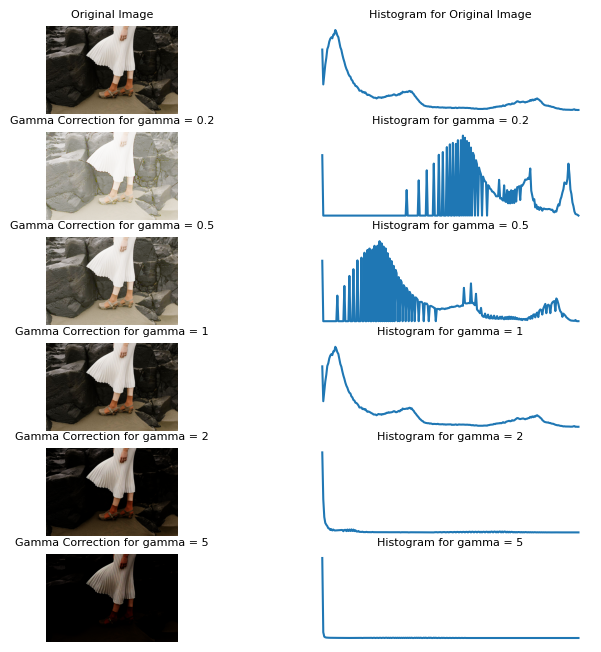

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\highlights_and_shadows.jpg')
assert img is not None

#Apply Linear gamma correction

gamma_1 = 0.2
gamma_2 = 0.5
gamma_3 = 1.0
gamma_4 = 2.0
gamma_5 = 5.0

t1 = np.array([((i/255.0)**gamma_1)*255 for i in np.arange(0,256)]).astype('uint8')
t2 = np.array([((i/255.0)**gamma_2)*255 for i in np.arange(0,256)]).astype('uint8')
t3 = np.array([((i/255.0)**gamma_3)*255 for i in np.arange(0,256)]).astype('uint8')
t4 = np.array([((i/255.0)**gamma_4)*255 for i in np.arange(0,256)]).astype('uint8')
t5 = np.array([((i/255.0)**gamma_5)*255 for i in np.arange(0,256)]).astype('uint8')

g1 = cv.LUT(img, t1)
g2 = cv.LUT(img, t2)
g3 = cv.LUT(img, t3)
g4 = cv.LUT(img, t4)
g5 = cv.LUT(img, t5)

hist = cv.calcHist([img], [0], None, [256], [0, 256])
hist1 = cv.calcHist([g1], [0], None, [256], [0, 256])
hist2 = cv.calcHist([g2], [0], None, [256], [0, 256])
hist3 = cv.calcHist([g3], [0], None, [256], [0, 256])
hist4 = cv.calcHist([g4], [0], None, [256], [0, 256])
hist5 = cv.calcHist([g5], [0], None, [256], [0, 256])

fig, ax = plt.subplots(6, 2, figsize=(8, 8))
ax[0, 0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image', fontsize=8)
ax[0, 1].plot(hist)
ax[0, 1].set_title('Histogram for Original Image', fontsize=8)
ax[1, 0].imshow(cv.cvtColor(g1, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[1, 0].set_title('Gamma Correction for gamma = 0.2', fontsize=8)
ax[1, 1].plot(hist1)
ax[1, 1].set_title('Histogram for gamma = 0.2', fontsize=8)
ax[2, 0].imshow(cv.cvtColor(g2, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[2, 0].set_title('Gamma Correction for gamma = 0.5', fontsize=8)
ax[2, 1].plot(hist2)
ax[2, 1].set_title('Histogram for gamma = 0.5', fontsize=8)
ax[3, 0].imshow(cv.cvtColor(g3, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[3, 0].set_title('Gamma Correction for gamma = 1', fontsize=8)
ax[3, 1].plot(hist3)
ax[3, 1].set_title('Histogram for gamma = 1', fontsize=8)
ax[4, 0].imshow(cv.cvtColor(g4, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[4, 0].set_title('Gamma Correction for gamma = 2', fontsize=8)
ax[4, 1].plot(hist4)
ax[4, 1].set_title('Histogram for gamma = 2', fontsize=8)
ax[5, 0].imshow(cv.cvtColor(g5, cv.COLOR_BGR2RGB), cmap='gray', vmin=0, vmax=255)
ax[5, 0].set_title('Gamma Correction for gamma = 5', fontsize=8)
ax[5, 1].plot(hist5)
ax[5, 1].set_title('Histogram for gamma = 5', fontsize=8)
for row in ax:
    for a in row:
        a.axis('off')
plt.show()

# Task 4

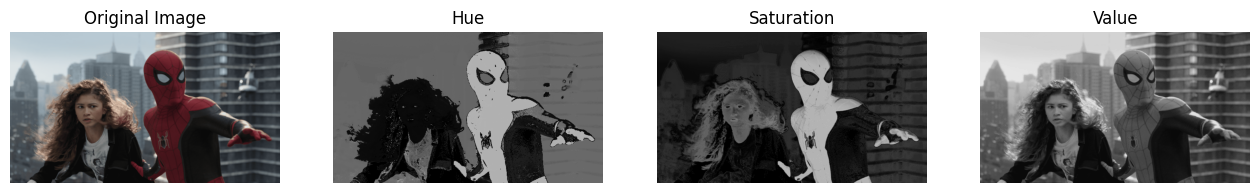

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images\spider.png')
assert img is not None

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()





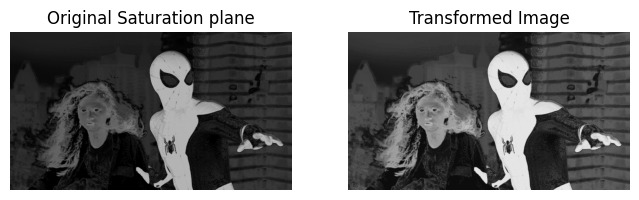

In [61]:
#Intensity transformation function

def IntensityTransformation(x):
    alpha = 0.5
    sigma = 70
    curve = x + alpha*128*(np.exp(-((x-128)**2)/(2*sigma**2)))
    return np.minimum(curve, 255)

#Get the curve
f = np.linspace(0,255,256)
y = IntensityTransformation(f)

#Apply the transformation function to the image
transformed_img = y[img_saturation]

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Saturation plane')
ax[1].imshow(transformed_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax:
    a.axis('off')
plt.show()

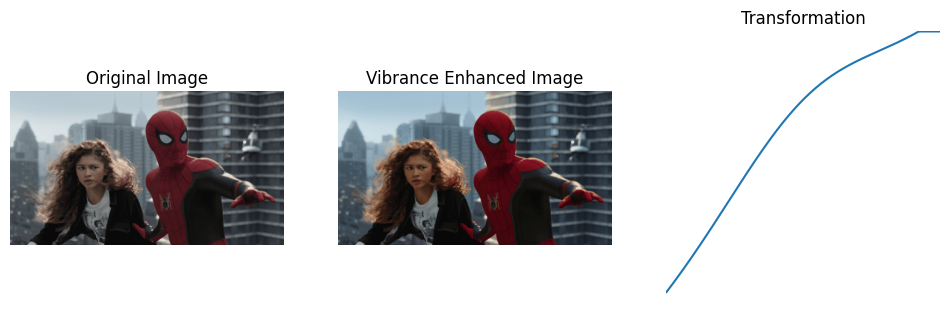

In [59]:
# Ensure all channels have the same dimensions and data types
assert img_hue.shape == transformed_img.shape == img_value.shape, "Channel dimensions do not match"
transformed_img = transformed_img.astype(img_hue.dtype)  # Ensure data types match
assert img_hue.dtype == transformed_img.dtype == img_value.dtype, "Channel data types do not match"

#Recombine the image
hsv_merged = cv.merge([img_hue, transformed_img, img_value])
assert hsv_merged is not None
#Convert the image back to RGB
img_converted_rgb = cv.cvtColor(hsv_merged, cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_converted_rgb, cmap='hsv', vmin=0, vmax=255)
ax[1].set_title('Vibrance Enhanced Image')
ax[2].plot(y)
ax[2].set_title('Transformation')
ax[2].set_xlabel(r'Input, $f(\mathbf{x})$')
ax[2].set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax[2].set_xlim(0,255)
ax[2].set_ylim(0,255)
ax[2].set_aspect('equal')
for a in ax:
    a.axis('off')

plt.show()

# Task 5

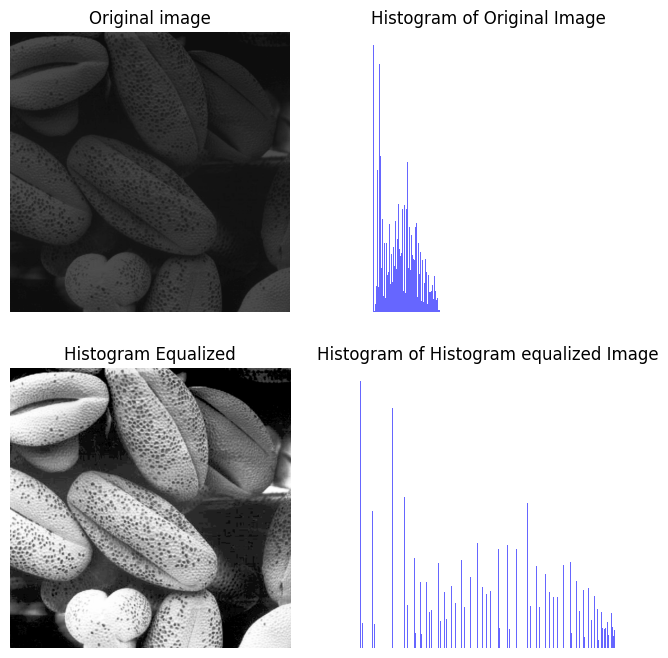

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images/shells.tif',cv.IMREAD_GRAYSCALE)

#Function to equalize the histogram of an image
def histogramEqualized(image):
    
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    cdf = hist.cumsum()  # Cumulative sum of the histogram
    cdf_normalized = cdf * hist.max() / cdf.max()  # Normalizing the CDF for visualization
    
    cdf_min = cdf[cdf > 0].min()  # Get the minimum non-zero value of the CDF
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf.max() - cdf_min)
    cdf_normalized = cdf_normalized.astype(np.uint8)  # Map the CDF values to 0-255 range
    
    equalized_image = cdf_normalized[image]  # Replace pixel values using the CDF
    
    return equalized_image, cdf_normalized

img = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
g,a = histogramEqualized(img)

#plot the images and graphs
fig, ax = plt.subplots(2,2,figsize=(8,8))
ax[0,0].imshow(img, cmap ='gray', vmin=0,vmax=255)
ax[0,0].set_title('Original image')
ax[0,1].hist(img.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.6)
ax[0,1].set_title('Histogram of Original Image')
ax[1,0].imshow(g, cmap = 'gray', vmin=0, vmax=255)
ax[1,0].set_title('Histogram Equalized')
ax[1,1].hist(g.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.6)
ax[1,1].set_title('Histogram of Histogram equalized Image')
for row in ax:
    for a in row:
        a.axis('off')

plt.show()

# Task 6

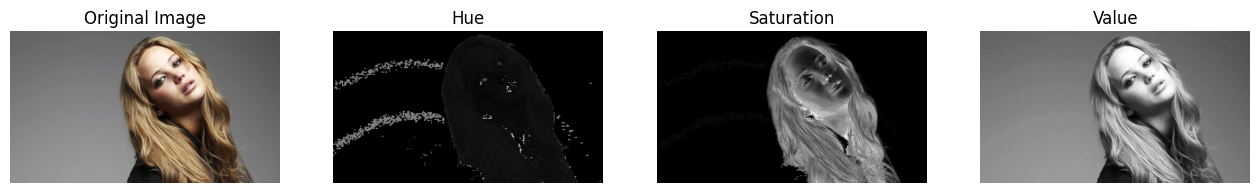

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('a1images/jeniffer.jpg')
assert img is not None
img_copy = img.copy()

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Convert the image to RBG since the img opens in BGR format
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#Convert the image to HSV
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

#Split the image into Hue, Saturation and Value
img_hue, img_saturation, img_value = cv.split(img_hsv)

#plot the images
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Hue')
ax[2].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Saturation')
ax[3].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Value')
for a in ax:
    a.axis('off')

plt.show()


Text(0.5, 1.0, 'Histogram')

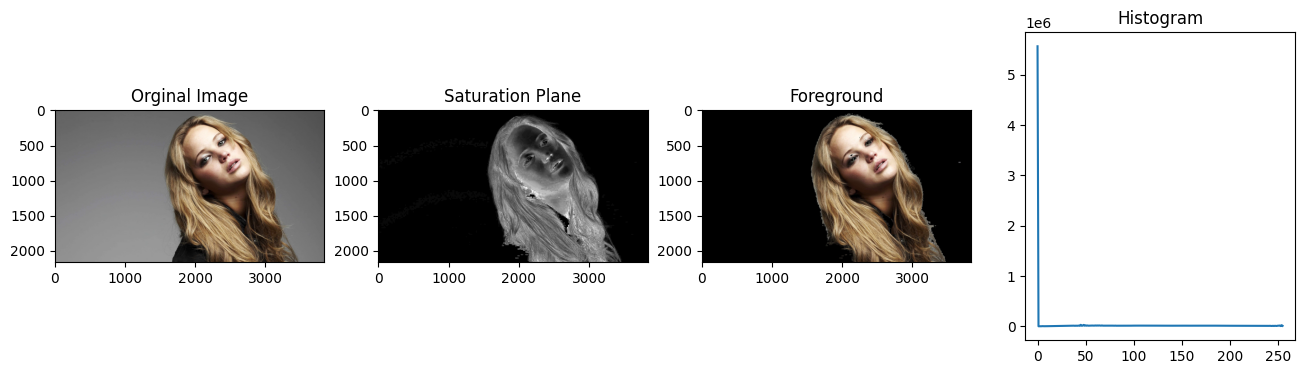

In [109]:
#Choose the saturation plane for applying the threshold mask
rows,cols,channels = img.shape
#roi = img[0:rows, 0:cols]
ret, mask = cv.threshold(img_saturation, 11, 255, cv.THRESH_BINARY) #set threshold as 11 for good mask selection
mask_inv = cv.bitwise_not(mask)
img_fg = cv.bitwise_and(img_rgb, img_rgb, mask=mask)
img_bg = cv.bitwise_and(img,img,mask=mask_inv)

hist = cv.calcHist([img_fg], [0], None, [256], [0, 256] )

fig, ax = plt.subplots(1,4,figsize=(16,4))
ax[0].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Orginal Image')
ax[1].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation Plane')
ax[2].imshow(img_fg, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Foreground')
ax[3].plot(hist)
ax[3].set_title('Histogram')

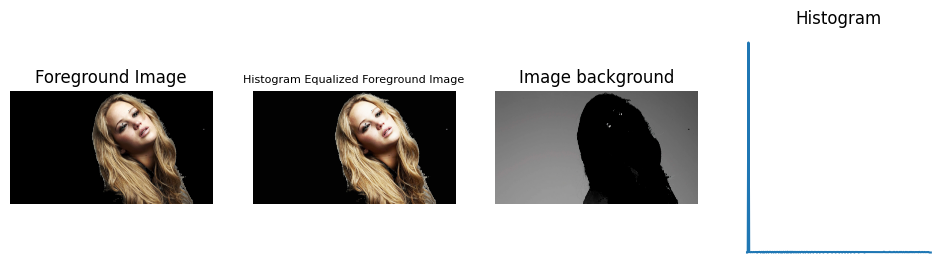

In [110]:
#g = cv.equalizeHist(img_fg)
# hist = cv.calcHist([img_fg], [0], None, [256], [0, 256])
# cdf = hist.cumsum()

#Histogram Equalization
M, N, _ = img_fg.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(img_fg.ravel(), 256, [0, 256])
cdf = hist.cumsum()
t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
g = t[img_fg]

hist_g, bins_g = np.histogram(g.ravel(), 256, [0, 256])

# g = cv.equalizeHist(img_fg)
# hist_g = cv.calcHist([g], [0], None, [0, 256])

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
ax[0].imshow(img_fg, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Foreground Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalized Foreground Image', fontsize=8)
ax[2].imshow(img_bg, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Image background')
ax[3].plot(hist_g)
ax[3].set_title('Histogram')

for a in ax:
    a.axis('off')

plt.show()

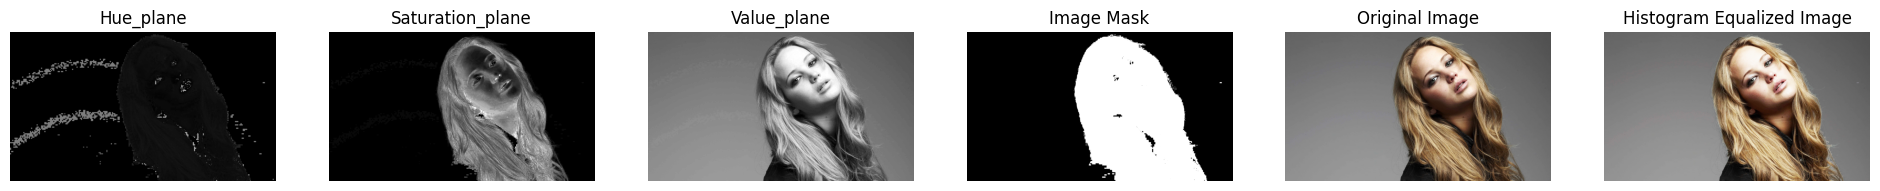

In [119]:
dst = cv.add(img_bg, g)
img_copy[0:rows, 0:cols] = dst

#plot hue,saturation,value planes and mask, original and the histogram qualized image
fig, ax = plt.subplots(1, 6, figsize=(24, 8))
ax[0].imshow(img_hue, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue_plane')
ax[1].imshow(img_saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation_plane')
ax[2].imshow(img_value, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value_plane')
ax[3].imshow(mask, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Image Mask')
ax[4].imshow(img_rgb, cmap='gray', vmin=0, vmax=255)
ax[4].set_title('Original Image')
ax[5].imshow(img_copy, cmap='gray', vmin=0, vmax=255)
ax[5].set_title('Histogram Equalized Image')
for a in ax:
    a.axis('off')

plt.show()

# Task 7

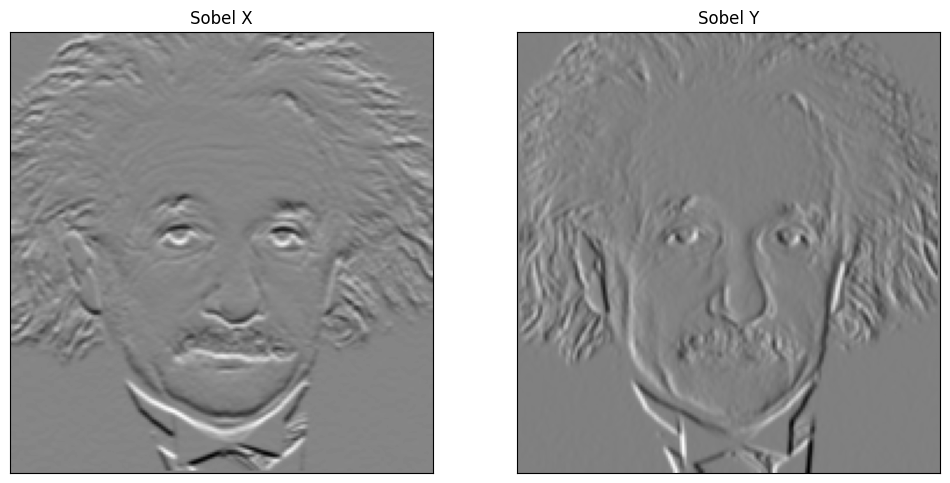

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(img, cv.CV_64F, sobel_x)
im_y = cv.filter2D(img, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(12,6))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

#

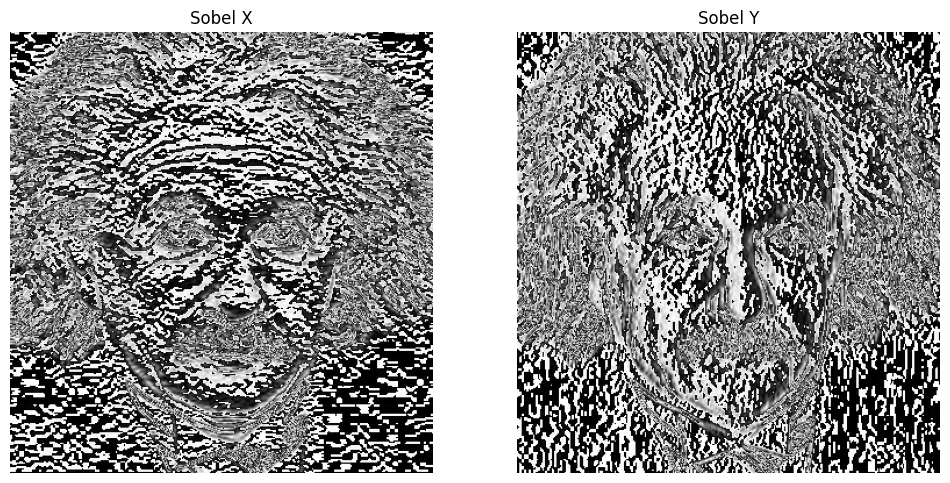

In [10]:
#By applying convolution with the sobel kernels, we can do the sobel filtering

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.ndimage import convolve

img = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

#define the sobel kernels
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

#Apply covolution with the sobel kernels
im_x = convolve(img,sobel_x) 
im_y = convolve(img,sobel_y)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].axis('off')
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].axis('off')
plt.show()

# Task 8

C:\Users\ANUSHKA\AppData\Local\Temp\ipykernel_18500\2632491001.py:47: RuntimeWarning: overflow encountered in scalar subtract
  top = top_left + (top_right - top_left) * fy
C:\Users\ANUSHKA\AppData\Local\Temp\ipykernel_18500\2632491001.py:48: RuntimeWarning: overflow encountered in scalar subtract
  bottom = bottom_left + (bottom_right - bottom_left) * fy


Normalized SSD (Nearest Neighbor): 137.20961419753087
Normalized SSD (Bilinear Interpolation): 5087.241481481481


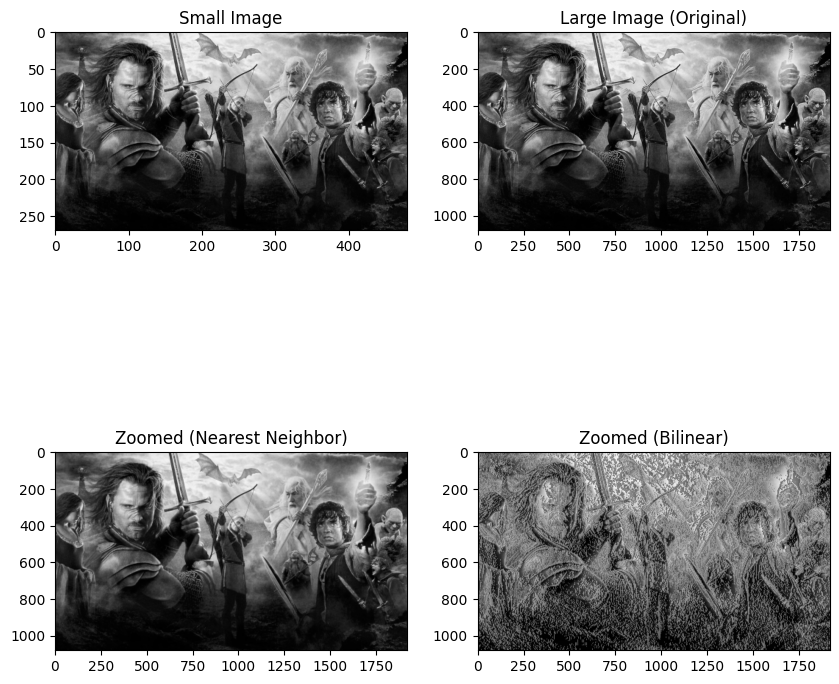

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def nearestNeighborZoom(image, scale_factor):
    """ Zoom image using nearest neighbor interpolation """
    height, width = image.shape[:2]
    if len(image.shape) == 2:  # Grayscale image
        zoomed_image = np.zeros((int(height * scale_factor), int(width * scale_factor)), dtype=image.dtype)
    else:  # Color image
        zoomed_image = np.zeros((int(height * scale_factor), int(width * scale_factor), image.shape[2]), dtype=image.dtype)
    
    for i in range(zoomed_image.shape[0]):
        for j in range(zoomed_image.shape[1]):
            orig_x = int(i / scale_factor)
            orig_y = int(j / scale_factor)
            zoomed_image[i, j] = image[orig_x, orig_y]
    
    return zoomed_image

def bilinearInterpolationZoom(image, scale_factor):
    """ Zoom image using bilinear interpolation """
    height, width = image.shape[:2]
    if len(image.shape) == 2:  # Grayscale image
        zoomed_image = np.zeros((int(height * scale_factor), int(width * scale_factor)), dtype=image.dtype)
    else:  # Color image
        zoomed_image = np.zeros((int(height * scale_factor), int(width * scale_factor), image.shape[2]), dtype=image.dtype)
    
    for i in range(zoomed_image.shape[0]):
        for j in range(zoomed_image.shape[1]):
            orig_x = i / scale_factor
            orig_y = j / scale_factor

            x1 = int(orig_x)
            x2 = min(x1 + 1, height - 1)
            y1 = int(orig_y)
            y2 = min(y1 + 1, width - 1)

            fx = orig_x - x1
            fy = orig_y - y1

            top_left = image[x1, y1]
            top_right = image[x1, y2]
            bottom_left = image[x2, y1]
            bottom_right = image[x2, y2]

            top = top_left + (top_right - top_left) * fy
            bottom = bottom_left + (bottom_right - bottom_left) * fy
            zoomed_image[i, j] = top + (bottom - top) * fx

    return zoomed_image

def computeNormalizedSSD(original_image, zoomed_image):
    """ Compute normalized SSD between original and zoomed images """
    diff = original_image.astype(np.float32) - zoomed_image.astype(np.float32)
    ssd = np.sum(diff ** 2)
    normalized_ssd = ssd / original_image.size
    return normalized_ssd

def loadAndResizeImages(small_image_path, large_image_path, scale_factor):
    """ Load small and large images for testing """
    small_image = cv.imread(small_image_path, cv.IMREAD_GRAYSCALE)
    large_image = cv.imread(large_image_path, cv.IMREAD_GRAYSCALE)

    zoomed_nearest = nearestNeighborZoom(small_image, scale_factor)
    zoomed_bilinear = bilinearInterpolationZoom(small_image, scale_factor)
    
    return small_image, large_image, zoomed_nearest, zoomed_bilinear

# Test the implementation
scale_factor = 4  # The factor by which we zoom the small image
small_image_path = 'a1images/a1q5images/im01small.png'  # Path to small image
large_image_path = 'a1images/a1q5images/im01.png'  # Path to large image (ground truth)

# Load and process the images
small_image, large_image, zoomed_nearest, zoomed_bilinear = loadAndResizeImages(small_image_path, large_image_path, scale_factor)

# Compute normalized SSD between original large image and zoomed images
ssd_nearest = computeNormalizedSSD(large_image, zoomed_nearest)
ssd_bilinear = computeNormalizedSSD(large_image, zoomed_bilinear)

print(f"Normalized SSD (Nearest Neighbor): {ssd_nearest}")
print(f"Normalized SSD (Bilinear Interpolation): {ssd_bilinear}")

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(cv.cvtColor(small_image, cv.COLOR_BGR2RGB)), plt.title("Small Image")
plt.subplot(2, 2, 2), plt.imshow(cv.cvtColor(large_image, cv.COLOR_BGR2RGB)), plt.title("Large Image (Original)")
plt.subplot(2, 2, 3), plt.imshow(cv.cvtColor(zoomed_nearest, cv.COLOR_BGR2RGB)), plt.title("Zoomed (Nearest Neighbor)")
plt.subplot(2, 2, 4), plt.imshow(cv.cvtColor(zoomed_bilinear, cv.COLOR_BGR2RGB)), plt.title("Zoomed (Bilinear)")
plt.show()

# Task 9

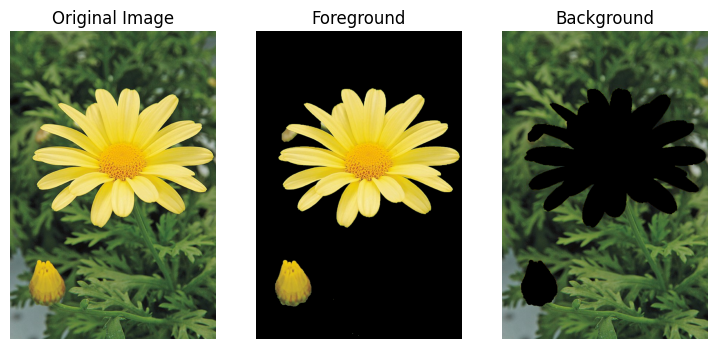

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('a1images\daisy.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = img.copy()
assert img is not None

M,N,c = img.shape
mask = np.zeros(img_2.shape[:2],np.uint8)
 
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
 
rect = (50,50,img.shape[1]-50,img.shape[0]-50)
cv.grabCut(img_2,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
 
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
foreground = img* mask2[:, :, np.newaxis]  # Foreground
background = img* (1 - mask2[:, :, np.newaxis])  # Background


fig, ax = plt.subplots(1, 3, figsize=(9, 6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(foreground, cmap='gray',vmin=0, vmax=255)
ax[1].set_title('Foreground')
ax[2].imshow(background, cmap='gray',vmin=0, vmax=255)
ax[2].set_title('Background')

for a in ax:
    a.axis('off')

plt.show()

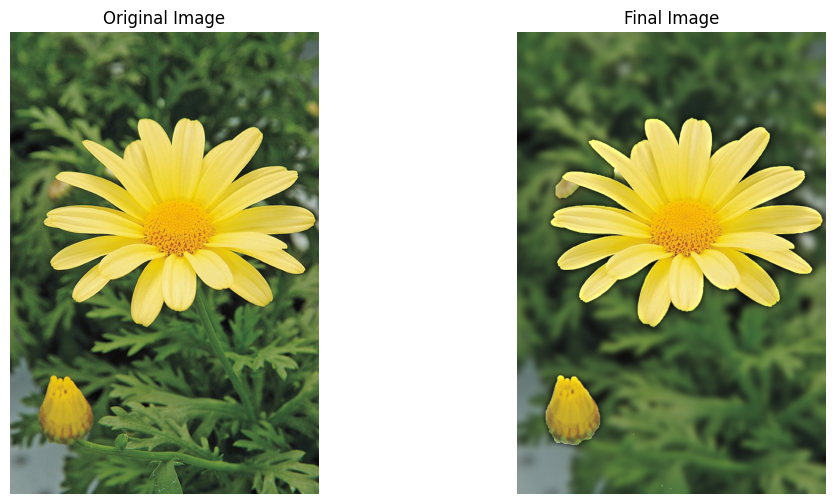

In [8]:
#Bluring the background
background = cv.GaussianBlur(background, (25, 25), 0)

#Combine the foreground and background
final_image = cv.add(foreground, background)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(final_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Final Image')
for a in ax:
    a.axis('off')

plt.show()
